**Table of contents**<a id='toc0_'></a>    
- 1. [图片增广](#toc1_)    
- 2. [加载图片](#toc2_)    
- 3. [Train](#toc3_)    
- 4. [CNN](#toc4_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# 1. <a id='toc1_'></a>[图片增广](#toc0_)

# 2. <a id='toc2_'></a>[加载图片](#toc0_)

In [2]:
import torch 
import torch.nn as nn 
import torchvision 
import IPython.display as display

- PIL的Image

In [ ]:
# from PIL import Image

# Image.open()

- torchvision.io

In [ ]:
# import torchvision.io as io

# io.image.read_image()

- 直接加载torchvision.datasets

In [3]:
# 数据准备
dbs = './Pytorch_datasets/'

train_dataset = torchvision.datasets.MNIST(
    root=dbs, 
    train=True, 
    download=True, 
    transform=torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(), 
        torchvision.transforms.Normalize((0.1307,), (0.3081,))
        ])
)

test_dataset = torchvision.datasets.MNIST(
    root=dbs, 
    train=False, 
    download=True, 
    transform=torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(), 
        torchvision.transforms.Normalize((0.1307,), (0.3081,))
        ])
)

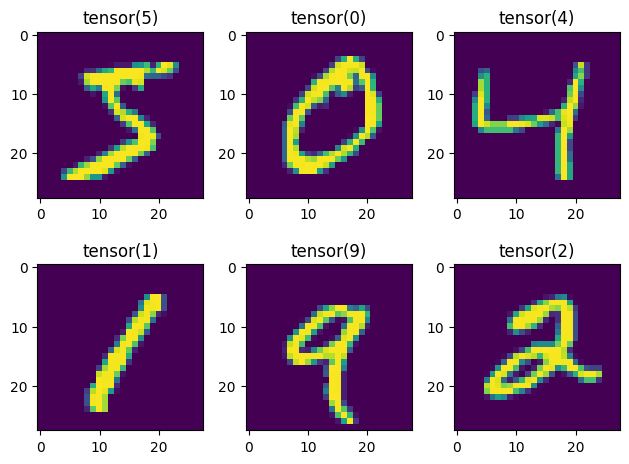

In [4]:
import matplotlib.pyplot as plt 

nums = 6
plt.figure()
for i in range(nums):
    plt.subplot(2,int(nums/2),i+1)
    plt.imshow(train_dataset.data[i])
    plt.title(train_dataset.targets[i])
plt.tight_layout()

In [6]:
from torch.utils import data

def get_workers():
    return 3

# 迭代型数据方式
train_iter = data.DataLoader(
    dataset=train_dataset, 
    batch_size=128, 
    shuffle=True, 
    num_workers=get_workers()
)

test_iter = data.DataLoader(
    dataset = test_dataset, 
    batch_size = 128, 
    shuffle = True, 
    num_workers=get_workers()
)

# 3. <a id='toc3_'></a>[Train](#toc0_)

In [9]:
def train_step(epoches=10, Net=Net):
    device = 'cuda[0]' if torch.cuda.is_available() else 'cpu'
    net = Net().to(device)
    loss_fn = nn.CrossEntropyLoss()
    opt = torch.optim.SGD(params=net.parameters(), lr=0.5)
    # epoches = 100
    train_loss_list = []
    val_loss_list = []
    train_acc_list = []
    val_acc_list = []
    train_X, train_y = train_dataset.data.to(device, dtype=torch.float32), train_dataset.targets.to(device)
    val_X, val_y = test_dataset.data.to(device, dtype=torch.float32), test_dataset.targets.to(device)

    def loss_acc(net, loss_fn, X, y)->tuple:
        '''loss/acc'''
        # loss
        loss = loss_fn(net(X), y)
        # acc
        ok = torch.argmax(net(X), dim=1) == y
        ok_acc = ok.sum()/len(ok)
        return (loss.detach().numpy(), ok_acc.detach().numpy())

    def dl_plot(train_loss_list:list, val_loss:list, train_acc_list:list, val_acc_list:list):
            '''绘图'''
            plt.close()
            fig = plt.figure(figsize=(6, 3))

            plt.subplot(121)
            plt.plot(train_loss_list, label='train_loss')
            plt.plot(val_loss_list, label='val_loss')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('loss')

            plt.subplot(122)
            plt.plot(train_acc_list, label='train_acc')
            plt.plot(val_acc_list, label='val_acc')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('acc')

            plt.tight_layout()

            display.display(fig)
            display.clear_output(wait=True)

    for epoch in range(epoches):
        for X, y in train_iter:
            X = X.to(device)
            y = y.to(device)
            net.train()
            y_hat = net(X)
            loss = loss_fn(y_hat, y)
            opt.zero_grad()
            loss.backward()
            opt.step()

        # train_loss: total
        # train_acc: total
        train_out = loss_acc(net=net, loss_fn=loss_fn, X=train_X, y=train_y)
        train_loss_list.append(train_out[0])
        train_acc_list.append(train_out[1])

        net.eval()
        with torch.no_grad():
            # val_loss: total
            # val_acc: total
            val_out = loss_acc(net=net, loss_fn=loss_fn, X=val_X, y=val_y)
            val_loss_list.append(val_out[0])
            val_acc_list.append(val_out[1])

        dl_plot(train_loss_list, val_loss_list, train_acc_list, val_acc_list)

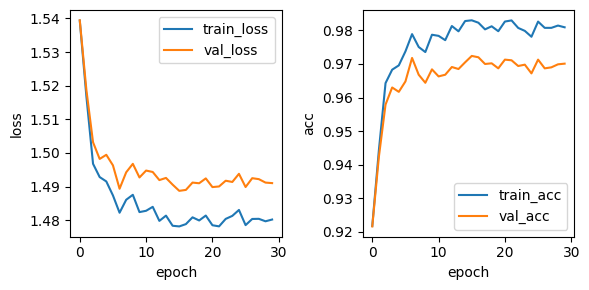

In [12]:
# 网络结构
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 256), 
            nn.ReLU(),
            nn.Linear(256, 10), 
            nn.Softmax()
            )
        
    def forward(self, X):
        return self.network(X)
    
train_step(epoches=30, Net=Net)

# 4. <a id='toc4_'></a>[CNN](#toc0_)

In [85]:
def train_step1(epoches=10, Net=Net, batch_size=128):
    device = 'cuda[0]' if torch.cuda.is_available() else 'cpu'
    net = Net.to(device)
    loss_fn = nn.CrossEntropyLoss()
    opt = torch.optim.SGD(params=net.parameters(), lr=0.5)
    # epoches = 100
    train_loss_list = []
    val_loss_list = []
    train_acc_list = []
    val_acc_list = []
    train_X, train_y = train_dataset.data.to(device, dtype=torch.float32), train_dataset.targets.to(device)
    val_X, val_y = test_dataset.data.to(device, dtype=torch.float32), test_dataset.targets.to(device)

    def dl_plot(train_loss_list:list, val_loss:list, train_acc_list:list, val_acc_list:list):
            '''绘图'''
            plt.close()
            fig = plt.figure(figsize=(6, 3))

            plt.subplot(121)
            plt.plot(train_loss_list, label='train_loss')
            plt.plot(val_loss_list, label='val_loss')
            plt.legend()
            # plt.xlim([0, epoches])
            plt.xlabel('epoch')
            plt.ylabel('loss')

            plt.subplot(122)
            plt.plot(train_acc_list, label='train_acc')
            plt.plot(val_acc_list, label='val_acc')
            plt.legend()
            # plt.xlim([0, epoches])
            # plt.ylim(0, 1)
            # plt.yticks(torch.arange(0, 1, 0.1).item())
            plt.yticks(torch.arange(0.9, 1+0.01, 0.01).numpy())
            plt.xlabel('epoch')
            plt.ylabel('acc')

            # plt.tight_layout()

            display.display(fig)
            display.clear_output(wait=True)

    for epoch in range(epoches):
        train_batch_loss = 0
        train_batch_acc = 0
        val_batch_loss = 0
        val_batch_acc = 0
        for X, y in train_iter:
            X = X.to(device)
            y = y.to(device)
            # print(X.shape)
            net.train()
            y_hat = net(X)
            loss = loss_fn(y_hat, y)
            opt.zero_grad()
            loss.backward()
            opt.step()

            train_batch_loss += loss.item()
            ok = torch.argmax(net(X), dim=1) == y
            train_acc = ok.sum()/len(ok)
            train_batch_acc += train_acc

        # train_loss: total-mean
        # train_acc: total-mean
        train_loss_list.append(train_batch_loss/len(train_iter))
        train_acc_list.append(train_batch_acc/len(train_iter))

        # train_loss: total 太慢了
        # train_acc: total 太慢了
        # train_out = loss_acc(net=net, loss_fn=loss_fn, X=train_X, y=train_y)
        # train_loss_list.append(train_out[0])
        # train_acc_list.append(train_out[1])

        net.eval()
        with torch.no_grad():
            # val_loss: total
            # val_acc: total
            # val_out = loss_acc(net=net, loss_fn=loss_fn, X=val_X, y=val_y)
            # val_loss_list.append(val_out[0])
            # val_acc_list.append(val_out[1])
            for i, j in test_iter:
                 i, j = i.to(device), j.to(device)
                 val_loss = loss_fn(net(i), j)
                 val_batch_loss += val_loss.item()

                 ok = torch.argmax(net(i), dim=1) == j
                 val_acc = ok.sum()/len(ok)
                 val_batch_acc += val_acc
                #  print(i.shape[0])

            val_loss_list.append(val_batch_loss/len(test_iter))
            val_acc_list.append(val_batch_acc/len(test_iter))

        dl_plot(train_loss_list, val_loss_list, train_acc_list, val_acc_list)

- CNN的val_acc更高一些

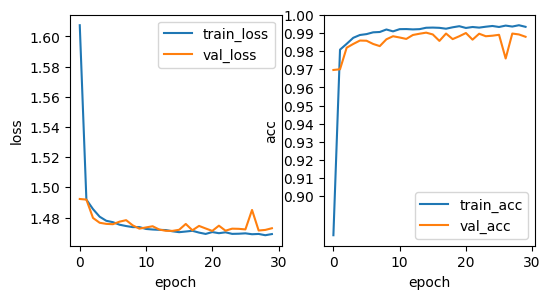

In [86]:
import torch.nn.functional as F 

# 定义简单的CNN模型
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.fc1 = nn.Linear(320, 50)  # 320是通过计算得到的
        self.fc2 = nn.Linear(50, 10)
        self.sf = nn.Softmax()

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = x.view(-1, 320)  # 展平
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.sf(x)
        return x
    
simplecnn = SimpleCNN()

train_step1(epoches=30, Net=simplecnn)

- 普通MLP的val_acc有瓶颈

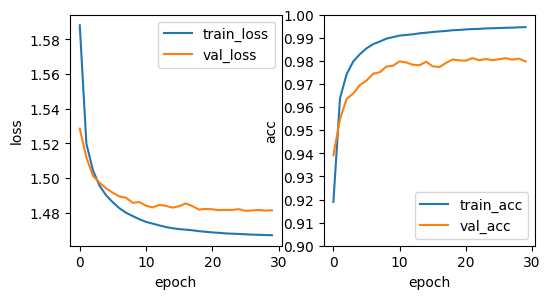

In [87]:
# 网络结构
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 256), 
            nn.ReLU(),
            nn.Linear(256, 10), 
            nn.Softmax()
            )
        
    def forward(self, X):
        return self.network(X)
    
net = Net()

train_step1(epoches=30, Net=net)

- LeNet

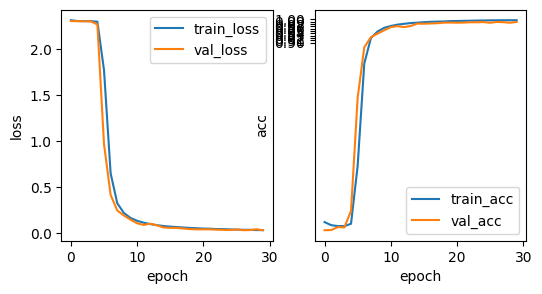

In [88]:
import torch.nn as nn
import  torch.nn.functional as F

# class LeNet(nn.Module):
#     def __init__(self):
#         super(LeNet,self).__init__()
#         self.conv1 = nn.Conv2d(3,16,5)
#         self.pool1 = nn.MaxPool2d(2,2)
#         self.conv2 = nn.Conv2d(16,32,5)
#         self.pool2 = nn.MaxPool2d(2,2)
#         self.fc1 = nn.Linear(32*5*5,120)
#         self.fc2 = nn.Linear(120,84)
#         self.fc3 = nn.Linear(84,10)

#     def forward(self,x):
#         x = F.relu(self.conv1(x))
#         x = self.pool1(x)
#         x = F.relu(self.conv2(x))
#         x = self.pool2(x)
#         x = x.view(-1,32*5*5)
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = self.fc3(x)
#         return x
    
LeNet = nn.Sequential(
    nn.Conv2d(1, 6, kernel_size=5, padding=2), 
    nn.Sigmoid(), 
    nn.AvgPool2d(kernel_size=2, stride=2), 
    nn.Conv2d(6, 16, kernel_size=5), 
    nn.Sigmoid(), 
    nn.AvgPool2d(kernel_size=2, stride=2), 
    nn.Flatten(), 
    nn.Linear(16 * 5 * 5, 120), 
    nn.Sigmoid(), 
    nn.Linear(120, 84), 
    nn.Sigmoid(), 
    nn.Linear(84, 10)
)

lenet = LeNet

train_step1(epoches=30, Net=lenet)